<a href="https://colab.research.google.com/github/rsmecking/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Ryan_Mecking_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

df = pd.read_csv (r'C:\Users\Ryan\Desktop\Coding Stuffs\Project 2 stuff/Datafiniti_Womens_Shoes_Jun19.csv')
print (df.shape)
df.head()

(10000, 32)


,id,dateAdded,dateUpdated,asins,brand,categories,primaryCategories,colors,dimension,ean / upc,...,prices.dateSeen,prices.isSale,prices.merchant,prices.offer,prices.returnPolicy,prices.shipping,prices.size,prices.sourceURLs,sizes,sourceURLs
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,2019-05-01T09:27:22Z,NaN,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,656000000000,...,2019-04-19T07:09:29Z,NaN,NaN,Online only,NaN,NaN,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,2019-05-01T09:27:19Z,NaN,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,NaN,192000000000,...,2019-04-24T09:14:11Z,NaN,NaN,Online only,NaN,NaN,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,2019-05-01T09:26:59Z,NaN,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,NaN,709000000000,...,2019-04-25T12:35:00.000Z,NaN,NaN,Online only,NaN,NaN,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...
3,AWpyxomE0U_gzG0hkA1q,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black/Multi,NaN,884000000000,...,2019-04-30T19:49:00.000Z,NaN,NaN,Online only: 20% off,NaN,NaN,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...
4,AWpyxChWJbEilcB6RhWx,2019-05-01T09:26:56Z,2019-05-01T09:26:56Z,NaN,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,White,NaN,887000000000,...,2019-04-19T07:07:46Z,NaN,NaN,Online only: 50% off,NaN,NaN,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...


In [0]:
df.dtypes

id                      object
dateAdded               object
dateUpdated             object
asins                   object
brand                   object
categories              object
primaryCategories       object
colors                  object
dimension               object
ean / upc                int64
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
name                    object
prices.amountMax       float64
prices.amountMin       float64
prices.availability       bool
prices.color            object
prices.condition       float64
prices.currency         object
prices.dateAdded       float64
prices.dateSeen         object
prices.isSale           object
prices.merchant        float64
prices.offer            object
prices.returnPolicy    float64
prices.shipping         object
prices.size             object
prices.sourceURLs       object
sizes                   object
sourceURLs              object
dtype: o

In [0]:
#Dropping all columns with over 95% NaNs.
df = df.drop(['asins', 'dateUpdated', 'prices.condition', 'dimension', 'prices.condition',
              'prices.dateAdded', 'prices.merchant', 'prices.returnPolicy',
              'prices.shipping'], axis=1)
df.shape

(10000, 24)

In [0]:
#Averaging out price of shoe. Most values were the same so it was basically a duplicate column
df['price'] = (df['prices.amountMin'] + df['prices.amountMax'])/2
df.shape

(10000, 25)

In [0]:
# Dropping now useless columns.
df = df.drop(['prices.amountMin', 'prices.amountMax'], axis=1)
df.shape

(10000, 23)

In [0]:
df.head()

,id,dateAdded,brand,categories,primaryCategories,colors,ean / upc,imageURLs,keys,manufacturer,...,prices.color,prices.currency,prices.dateSeen,prices.isSale,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,price
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,656000000000,https://i5.walmartimages.com/asr/f0dc6cbd-fa38...,"walmart.com-2013PXX8GMN7,656143772191,06561437...",NaN,...,Black,USD,2019-04-19T07:09:29Z,NaN,Online only,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...,29.95
1,AWpyyyb3AGTnQPR7wN-u,2019-05-01T09:27:19Z,Skechers,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Taupe,192000000000,NaN,"192283420528,0192283420528,walmart.com-21739WH...",NaN,...,Taupe,USD,2019-04-24T09:14:11Z,NaN,Online only,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,6 M US,https://www.walmart.com/ip/Skechers-Women-S-Yo...,84.00
2,AWpyzlajAGTnQPR7wOX8,2019-05-01T09:26:59Z,Floral,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,709000000000,NaN,"walmart.com-1MXIR45EG0EO,708750137976,07087501...",NaN,...,Black,USD,2019-04-25T12:35:00.000Z,NaN,Online only,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,5,https://www.walmart.com/ip/FLORAL-Pearl-Women-...,49.95
3,AWpyxomE0U_gzG0hkA1q,2019-05-01T09:26:56Z,Jambu,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black/Multi,884000000000,https://i5.walmartimages.com/asr/bf04e7cf-0f7b...,"883988336206,0883988336206,walmart.com-653BPY2...",NaN,...,Black/Multi,USD,2019-04-30T19:49:00.000Z,NaN,Online only: 20% off,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,9.5 BM US,https://www.walmart.com/ip/Jambu-Women-s-AMAL-...,127.20
4,AWpyxChWJbEilcB6RhWx,2019-05-01T09:26:56Z,Trotters,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,White,887000000000,NaN,"887246520857,0887246520857,walmart.com-3HL720G...",NaN,...,White,USD,2019-04-19T07:07:46Z,NaN,Online only: 50% off,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,11,https://www.walmart.com/ip/Women-s-Trotters-Bl...,47.66


In [0]:
df['price'].describe()

count    10000.000000
mean        72.202721
std        172.400446
min          5.500000
25%         34.990000
50%         52.485000
75%         83.962500
max       5000.000000
Name: price, dtype: float64

In [0]:
#Removing outliers 
df = df[(df['price'] <= np.percentile(df['price'], 99.5))]
df.shape

(9950, 23)

In [0]:
df['price'].describe()

count    9950.000000
mean       65.168357
std        40.993896
min         5.500000
25%        34.990000
50%        52.200000
75%        83.682500
max       260.590000
Name: price, dtype: float64

In [0]:
#Filling in missing values with word "missing" for imputing reason
df = df.fillna('Missing')

In [0]:
df.head(1)

,id,dateAdded,brand,categories,primaryCategories,colors,ean / upc,imageURLs,keys,manufacturer,...,prices.color,prices.currency,prices.dateSeen,prices.isSale,prices.offer,prices.size,prices.sourceURLs,sizes,sourceURLs,price
0,AWpyySsJAGTnQPR7wNt4,2019-05-01T09:27:22Z,City Classified,"Clothing,Shoes,Womens Shoes,All Womens Shoes",Shoes,Black,656000000000,https://i5.walmartimages.com/asr/f0dc6cbd-fa38...,"walmart.com-2013PXX8GMN7,656143772191,06561437...",Missing,...,Black,USD,2019-04-19T07:09:29Z,Missing,Online only,8,https://www.walmart.com/ip/City-Classified-Sty...,8,https://www.walmart.com/ip/City-Classified-Sty...,29.95


In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, 
                               random_state=42)
train.shape, test.shape

((7960, 23), (1990, 23))

In [0]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape

((6368, 23), (1592, 23))

In [0]:
#imports
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import plotly.express as px

In [0]:
# The status_group column is the target
target = 'price'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
#Target/Val assignment

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]
X_train.shape, X_val.shape, X_test.shape

((6368, 7), (1592, 7), (1990, 7))

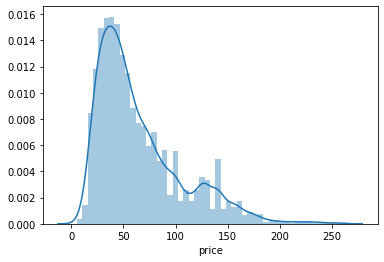

In [0]:
y = df['price']
sns.distplot(y);

In [0]:
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    LinearRegression()
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Validation Accuracy: 0.0695721437639667


In [0]:
#first quick model

pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, 
                           bootstrap=True, 
                           oob_score=True,
                           random_state=42,
                           max_depth=6,
                           n_jobs=-1)
)
pipeline.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [0]:
#Finding most important features
%matplotlib inline
import matplotlib.pyplot as plt
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();